In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [12]:
steam_df = pd.read_csv('Valve_Player_Data.csv')
twitch_df = pd.read_csv('Twitch_game_data.csv')
print(steam_df.head(10))
steam_df.isnull()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 90273: invalid start byte

In [3]:
steam_df2=steam_df.drop_duplicates()
steam_df2

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [4]:
#converting month year to date time
steam_df2['Month_Year'] = pd.to_datetime(steam_df['Month_Year'])
steam_df2['Avg_players'] = steam_df['Avg_players'].astype('int')

# Copy the data from steam_df based off of 'September 2021'
sep21_top_steam = steam_df[steam_df['Month_Year'] == 'September 2021'].copy() 
# Select columns to drop and set the change 
columns_to_drop = ['Month_Year', 'Gain', 'Percent_Gain', 'URL', 'Peak_Players', 'Date']
sep21_top_steam.drop(columns_to_drop, axis='columns', inplace=True)

# Function to normalize the output on the graph
def as_100k(value):
    return value/1

# Group game and avg players, get the sum, sort the values (ascending), and show top 10
top_2021_final = sep21_top_steam[['Game_Name', 'Avg_players']].groupby('Game_Name') \
            .sum() \
            .sort_values('Avg_players', ascending=False) \
            .head(10) \
            .apply(as_100k)


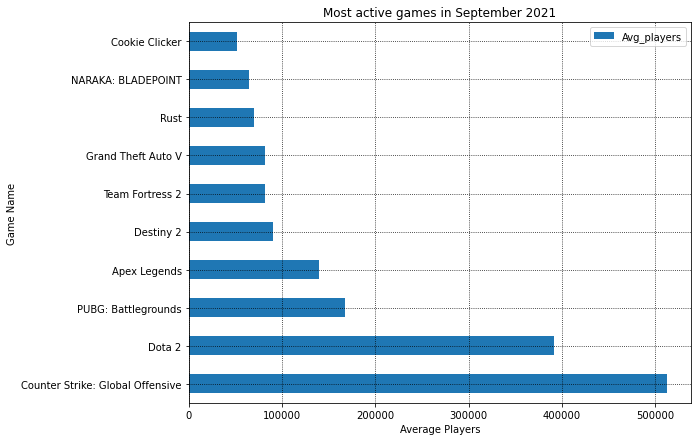

In [5]:
# Plot grouped data in a bar chart to show the most active game in September 2021
# rcParams is utilized to increase the graph size
rcParams['figure.figsize'] = 9,7
top_2021_final.plot(kind='barh')
plt.grid(True, color='k', linestyle=':')
plt.xlabel('Average Players')
plt.ylabel('Game Name')
plt.title('Most active games in September 2021');

In [6]:
# Make a copy of the steam_df, drop selected columns, and set the change to the df
growth = steam_df.copy()
top_twitch = twitch_df.copy()
columns_to_drop = ['Peak_Players', 'Gain', 'Percent_Gain', 'URL', 'Date']
growth.drop(columns_to_drop, axis='columns', inplace=True)

# Set appropriate date columns to_datetime, combine the top_twitch 'Month', 'Year' into 'Date'
growth['Month_Year'] = pd.to_datetime(growth['Month_Year'])
top_twitch['Date'] = pd.to_datetime(top_twitch[['Month', 'Year']].assign(DAY=1))

NameError: name 'twitch_df' is not defined

In [7]:
# Create 5 subsets based off the growth df
cs_go = growth[growth['Game_Name'] == 'Counter Strike: Global Offensive']
dota = growth[growth['Game_Name'] == 'Dota 2']
pubg = growth[growth['Game_Name'] == 'PUBG: Battlegrounds']
apex = growth[growth['Game_Name'] == 'Apex Legends']
tf2 = growth[growth['Game_Name'] == 'Team Fortress 2']
# Set the subset to the last year of data using .head(12) 
cs_go = cs_go.head(12)
dota = dota.head(12)
pubg = pubg.head(12)
apex = apex.head(12)
tf2 = tf2.head(12)

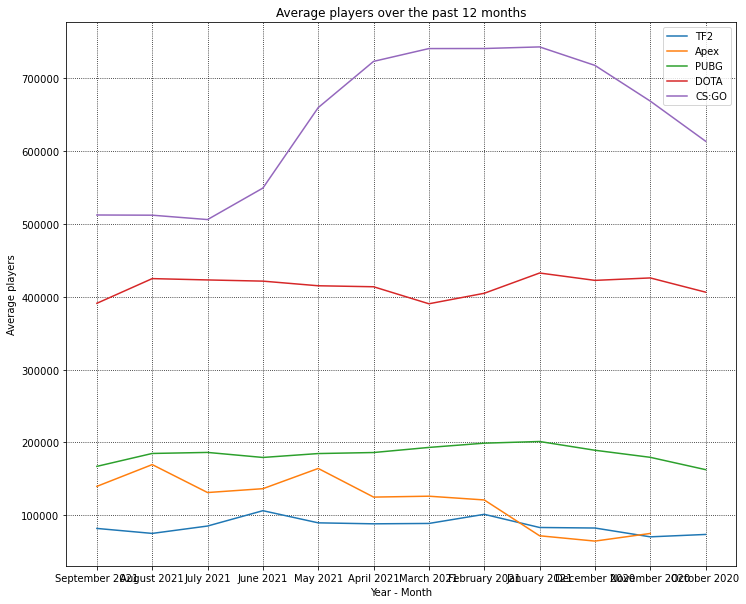

In [8]:
# rcParams to make the graph larger, along with plotting each subset using plt.plot
rcParams['figure.figsize'] = 12,10
plt.plot(tf2['Month_Year'], tf2['Avg_players'])
plt.plot(apex['Month_Year'], apex['Avg_players'])
plt.plot(pubg['Month_Year'], pubg['Avg_players'])
plt.plot(dota['Month_Year'], dota['Avg_players'])
plt.plot(cs_go['Month_Year'], cs_go['Avg_players'])
plt.grid(True, color='k', linestyle=':')
plt.title("Average players over the past 12 months")
plt.xlabel('Year - Month')
plt.ylabel('Average players')
plt.legend(['TF2', 'Apex', 'PUBG', 'DOTA', 'CS:GO']);


NameError: name 'top_twitch' is not defined